In [1]:
# Notebook to make data figures for the NSEM scipy poster./

In [2]:
from SimPEG.NSEM.Utils import plotDataTypes as pDt


In [3]:
# Make phusdo sections ~ 7133627.5
# Load the data
mtRecData = np.load('../ForwardModeling_noExtension_Coarse/MTdataStArr_nsmesh_HKPK1Coarse_noExtension.npy')
# Find the section coords
np.unique(mtRecData['y']) 

array([ 7133352.5,  7133377.5,  7133402.5,  7133427.5,  7133452.5,
        7133477.5,  7133502.5,  7133527.5,  7133552.5,  7133577.5,
        7133602.5,  7133627.5,  7133652.5,  7133677.5,  7133702.5,
        7133727.5,  7133752.5,  7133777.5,  7133802.5,  7133827.5,
        7133852.5,  7133877.5,  7133902.5,  7133927.5,  7133952.5])

In [19]:
def psudoSect_OffDiagTip_RealImag(dataArray,sectDict,colBarMode='single',cLevel=None):
    '''
    Function that plots psudo sections of difference of real, imaginary and abs of the MT impedance
    '''
    from mpl_toolkits.axes_grid1 import ImageGrid

    fig = plt.figure(1,(15., 9.))
    axes = ImageGrid(fig, (0.05,0.05,0.875,0.875),aspect=False,nrows_ncols = (2, 4),
                     axes_pad = 0.25,add_all=True,share_all=True,label_mode = "L",
                     cbar_mode=colBarMode,cbar_location='right',cbar_pad=0.005)

    [ax.set_yscale('log') for ax in axes]
    n,v = sectDict.items()[0]
    fig.text(0.5,0.96,'Data section at {:.1f} m Northing '.format(v),fontsize=18,ha='center')
    # Plot data
    comps = ['zxy','zxy','zyx','zyx','tzx','tzx','tzy','tzy']
    cTypes = ['real','imag','real','imag','real','imag','real','imag']
    colBs = [True]*8 #[False,False,False,True,False,False,False,True] #
    cLevels = [[1e-1,1e2],[1e-1,1e2],[1e-1,1e2],[1e-1,1e2],
               [1e-3,1e0],[1e-3,1e0],[1e-3,1e0],[1e-3,1e0]]
    csList = []
    for ax, comp, ctype, colB, cLevel in zip(axes,comps,cTypes,colBs,cLevels):
        csList.append(pDt.plotPsudoSectNSimpedance(ax,sectDict,dataArray,comp,ctype,cLevel=cLevel,colorbar=colB))

    return (fig, axes, csList)

def psudoSect_FullImpTip_RealImag(dataArray,sectDict,colBarMode='single',cLevel=None):
    '''
    Function that plots psudo sections of difference of real, imaginary and abs of the MT impedance
    '''
    from mpl_toolkits.axes_grid1 import ImageGrid

    fig = plt.figure(1,(15., 13.5))
    axes = ImageGrid(fig, (0.05,0.05,0.875,0.875),aspect=False,nrows_ncols = (3, 4),
                     axes_pad = 0.25,add_all=True,share_all=True,label_mode = "L",
                     cbar_mode=colBarMode,cbar_location='right',cbar_pad=0.005)

    [ax.set_yscale('log') for ax in axes]
    n,v = sectDict.items()[0]
    fig.text(0.5,0.96,'Data section at {:.1f} m Northing '.format(v),fontsize=18,ha='center')
    # Plot data
    comps = ['zxx','zxx','zxy','zxy','zyx','zyx','zyy','zyy','tzx','tzx','tzy','tzy']
    cTypes = ['real','imag','real','imag','real','imag','real','imag','real','imag','real','imag']
    colBs = [True]*12 #[False,False,False,True,False,False,False,True] #
    cLevels = [[1e-1,1e2],[1e-1,1e2],[1e-1,1e2],[1e-1,1e2],
               [1e-1,1e2],[1e-1,1e2],[1e-1,1e2],[1e-1,1e2],
               [1e-3,1e0],[1e-3,1e0],[1e-3,1e0],[1e-3,1e0]]
    csList = []
    for ax, comp, ctype, colB, cLevel in zip(axes,comps,cTypes,colBs,cLevels):
        csList.append(pDt.plotPsudoSectNSimpedance(ax,sectDict,dataArray,comp,ctype,cLevel=cLevel,colorbar=colB))

    return (fig, axes, csList)

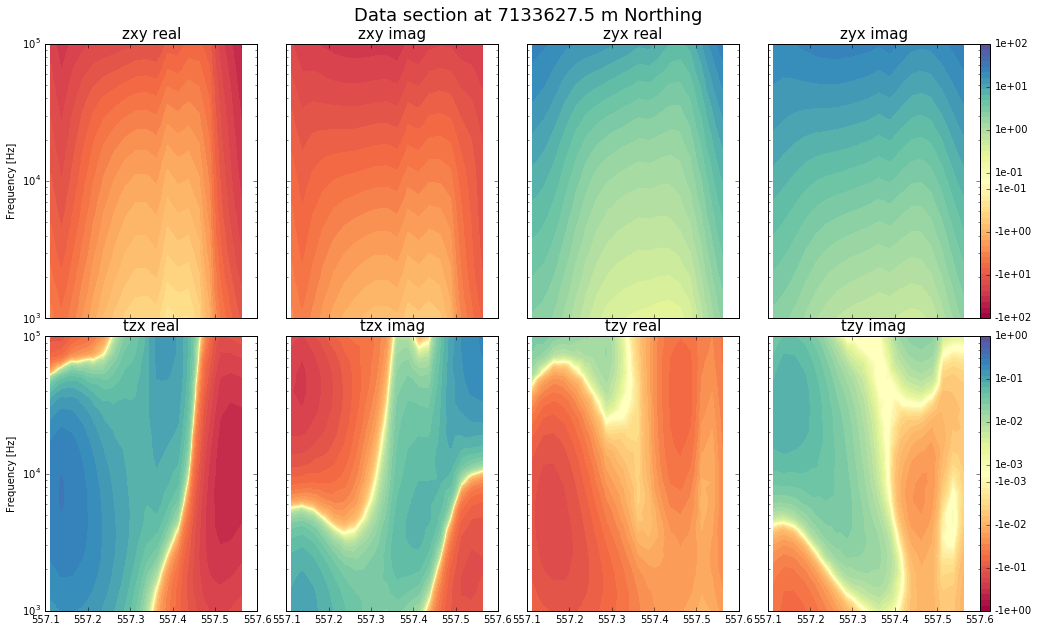

In [20]:
%matplotlib inline
# Make the plot
fig, axes, csList = psudoSect_OffDiagTip_RealImag(mtRecData,{'y':7133627.5},colBarMode='each')
[csList[i][1].remove() for i in [0,1,2,4,5,6]]
ax1 = axes[4]
ax1.set_xticklabels(np.round((np.array(ax1.get_xticks().tolist(),dtype=int)/100).tolist())/10.)
# ax1.get_xticklabels().rotation=45 
axes[0].set_ylabel('Frequency [Hz]')
ax1.set_ylabel('Frequency [Hz]')
fig.savefig('NSEM_OffDiagTip_exampleData.png',dpi=300,transparent=True)

In [14]:
ax1.get_xticklabels()

<a list of 6 Text xticklabel objects>

In [15]:
ax = axes[0]
ax.set_xticks([])
 
# ax1.set_xlabel('Easting UTM km')
# ax1.set_xticklabels(np.round((np.array(ax1.get_xticks().tolist(),dtype=int)/1000).tolist()))
# ax1.set_ylabel('Northing UTM km')
# ax1.set_yticklabels(np.round((np.array(ax1.get_yticks().tolist(),dtype=int)/1000).tolist()))
# ax1.set_aspect('equal')

[]

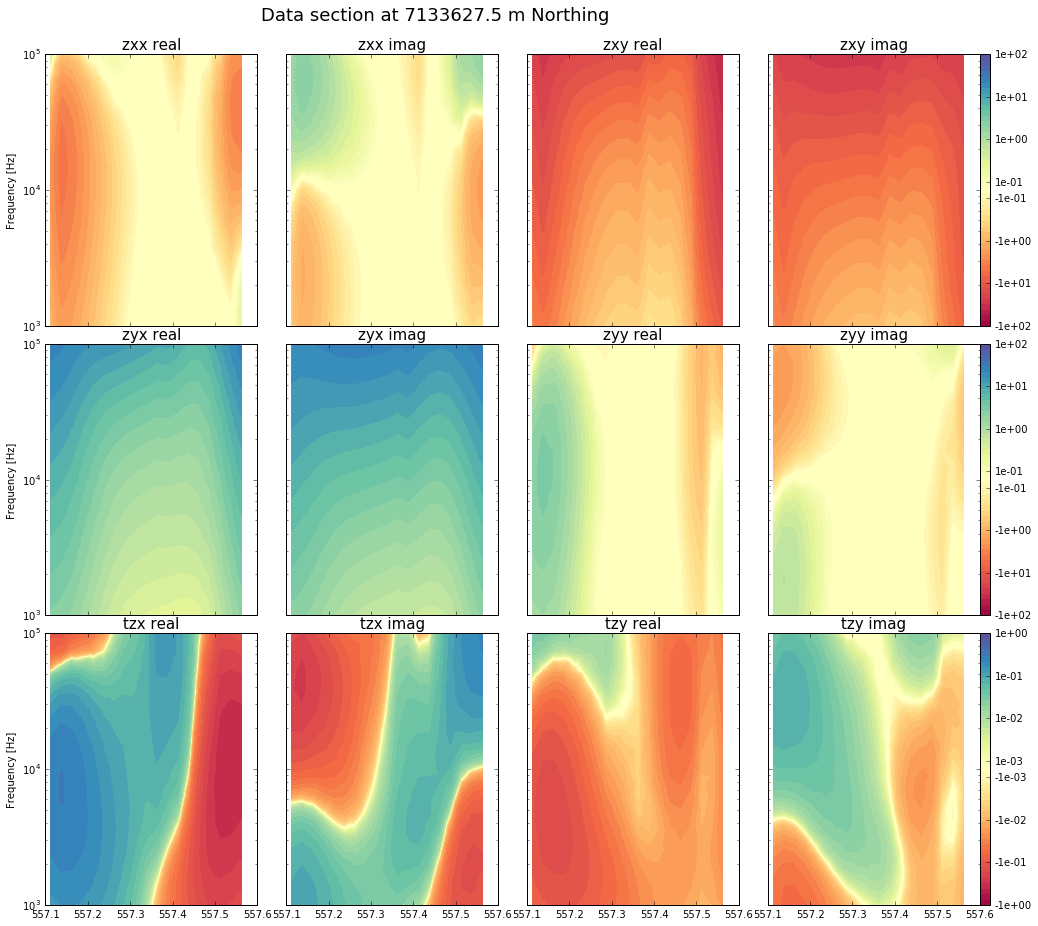

In [16]:
%matplotlib inline
# Make the plot
fig, axes, csList = psudoSect_FullImpTip_RealImag(mtRecData,{'y':7133627.5},colBarMode='each')
[csList[i][1].remove() for i in [0,1,2,4,5,6,8,9,10]]
ax1 = axes[4]
ax1.set_xticklabels(np.round((np.array(ax1.get_xticks().tolist(),dtype=int)/100).tolist())/10.)
# ax1.get_xticklabels().rotation=45 
axes[0].set_ylabel('Frequency [Hz]')
axes[4].set_ylabel('Frequency [Hz]')
axes[8].set_ylabel('Frequency [Hz]')
fig.savefig('NSEM_FullImpTip_exampleData.png',dpi=300,transparent=True)

In [9]:
pwd

u'/mnt/sdb1/Dropbox/Work/SimPEG/presentations/SciPy2016/MTwork/inv3d_HPK1'

In [10]:
plt.savefig?

In [11]:
NSEM.Utils.skindepth(100,100)

503.29212104487033